In [1]:
#Adapted from https://towardsdatascience.com/implementing-word2vec-in-pytorch-skip-gram-model-e6bae040d2fb
# and https://github.com/jojonki/word2vec-pytorch/blob/master/word2vec.ipynb

# see http://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [2]:
# Text is lightly adapted (removing punctuation and possesives) from The Raven by Edgar Allan Poe
text = """ Once upon a midnight dreary while I pondered weak and weary
 Over many a quaint and curious volume of forgotten lore
 While I nodded nearly napping suddenly there came a tapping
 As of some one gently rapping rapping at my chamber door
 This is some visiter I muttered tapping at my chamber door
                          Only this and nothing more

 Ah distinctly I remember it was in the bleak December
 And each separate dying ember wrought its ghost upon the floor
 Eagerly I wished the morrow vainly I had sought to borrow
 From my books surcease of sorrow sorrow for the lost Lenore
 For the rare and radiant maiden whom the angels name Lenore
                          Nameless here for evermore

 And the silken sad uncertain rustling of each purple curtain
 Thrilled me filled me with fantastic terrors never felt before
 So that now to still the beating of my heart I stood repeating
 This is some visiter entreating entrance at my chamber door
 Some late visiter entreating entrance at my chamber door
                          This it is and nothing more

 Presently my soul grew stronger hesitating then no longer
 Sir said I or Madam truly your forgiveness I implore
 But the fact is I was napping and so gently you came rapping
 And so faintly you came tapping tapping at my chamber door
 That I scarce was sure I heard you here I opened wide the door
                          Darkness there and nothing more

 Deep into that darkness peering long I stood there wondering fearing
 Doubting dreaming dreams no mortal ever dared to dream before
 But the silence was unbroken and the darkness gave no token
 And the only word there spoken was the whispered word Lenore
 This I whispered and an echo murmured back the word Lenore
                          Merely this and nothing more

 Back into the chamber turning all my soul within me burning
 Soon I heard again a tapping somewhat louder than before
 Surely said I surely that is something at my window lattice
 Let me see then what thereat is and this mystery explore
 Let my heart be still a moment and this mystery explore
                          This is the wind and nothing more

 Open here I flung the shutter when with many a flirt and flutter
 In there stepped a stately raven of the saintly days of yore
 Not the least obeisance made he not an instant stopped or stayed he
 But with mien of lord or lady perched above my chamber door
 Perched upon a bust of Pallas just above my chamber door
                          Perched and sat and nothing more

 Then this ebony bird beguiling my sad fancy into smiling
 By the grave and stern decorum of the countenance it wore
 Though thy crest be shorn and shaven thou I said art sure no craven
 Ghastly grim and ancient raven wandering from the Nightly shore
 Tell me what thy lordly name is on the Night Plutonian shore
                          Quoth the raven Nevermore

 Much I marvelled this ungainly fowl to hear discourse so plainly
 Though its answer little meaninglittle relevancy bore
 For we cannot help agreeing that no living human being
 Ever yet was blessed with seeing bird above his chamber door
 Bird or beast upon the sculptured bust above his chamber door
                         With such name as Nevermore

 But the raven sitting lonely on the placid bust spoke only
 That one word as if his soul in that one word he did outpour
 Nothing farther then he utterednot a feather then he fluttered
 Till I scarcely more than muttered Other friends have flown before
 On the morrow he will leave me as my hopes have flown before
                          Then the bird said Nevermore

 Startled at the stillness broken by reply so aptly spoken
 Doubtless said I what it utters is its only stock and store
 Caught from some unhappy master whom unmerciful Disaster
 Followed fast and followed faster till his songs one burden bore
 Till the dirges of his Hope that melancholy burden bore
                         Of Never nevermore

 But the raven still beguiling all my sad soul into smiling
 Straight I wheeled a cushioned seat in front of bird and bust and door
 Then upon the velvet sinking I betook myself to thinking
 Fancy unto fancy thinking what this ominous bird of yore
 What this grim ungainly ghastly gaunt and ominous bird of yore
                         Meant in croaking Nevermore

 This I sat engaged in guessing but no syllable expressing
 To the fowl whose fiery eyes now burned into my bosom core
 This and more I sat divining with my head at ease reclining
 On the cushion velvet lining that the lamplght gloated over
 But whose velvet violet lining with the lamplight gloating over
                          She shall press ah nevermore

 Then me thought the air grew denser perfumed from an unseen censer
 Swung by Angels whose faint foot-falls tinkled on the tufted floor
 Wretch I cried thy God hath lent theeby these angels he hath sent
 thee
 Respite respite and nepenthe from thy memories of Lenore
 Quaff oh quaff this kind nepenthe and forget this lost Lenore
                           Quoth the raven Nevermore

 Prophet said I thing of evil prophet still if bird or devil
 Whether Tempter sent or whether tempest tossed thee here ashore
 Desolate yet all undaunted on this desert land enchanted
 On this home by Horror haunted tell me truly I implore
 Is there is there balm in Gilead tell me tell me I implore
                           Quoth the raven Nevermore

 Prophet said I thing of evil prophet still if bird or devil
 By that Heaven that bends above us by that God we both adore
 Tell this soul with sorrow laden if within the distant Aidenn
 It shall clasp a sainted maiden whom the angels name Lenore
 Clasp a rare and radiant maiden whom the angels name Lenore
                           Quoth the raven Nevermore

 Be that word our sign of parting bird or fiend I shrieked upstarting
 Get thee back into the tempest and the Night Plutonian shore
 Leave no black plume as a token of that lie thy soul hath spoken
 Leave my loneliness unbroken quit the bust above my door
 Take thy beak from out my heart and take thy form from off my door
                          Quoth the raven Nevermore

 And the raven never flitting still is sitting still is sitting
 On the pallid bust of Pallas just above my chamber door
 And his eyes have all the seeming of a demon that is dreaming
 And the lamp-light over him streaming throws his shadow on the floor
 And my soul from out that shadow that lies floating on the floor
                          Shall be lifted nevermore""".lower().split()

In [3]:
# context window size is two
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right

# We find the unique words of the corpus so that we can create our vocabulary
vocab = set(text)
vocab_size = len(vocab)
print('vocab_size:', vocab_size)


# Build a dictionary so that each word in vocabualary is assigned a number and 
# and we can map each number back to the word
w2i = {w: i for i, w in enumerate(vocab)}
i2w = {i: w for i, w in enumerate(vocab)}
print(w2i)

vocab_size: 435
{'grave': 0, 'remember': 1, 'god': 2, 'parting': 3, 'to': 4, 'lies': 5, 'that': 6, 'tapping': 7, 'ever': 8, 'madam': 9, 'grim': 10, 'will': 11, 'other': 12, 'ebony': 13, 'obeisance': 14, 'was': 15, 'dying': 16, 'syllable': 17, 'betook': 18, 'sculptured': 19, 'silence': 20, 'my': 21, 'presently': 22, 'muttered': 23, 'stately': 24, 'shadow': 25, 'cannot': 26, 'all': 27, 'though': 28, 'gently': 29, 'dreaming': 30, 'lonely': 31, 'filled': 32, 'songs': 33, 'discourse': 34, 'pallid': 35, 'flutter': 36, 'sainted': 37, 'head': 38, 'no': 39, 'repeating': 40, 'longer': 41, 'aidenn': 42, 'tempter': 43, 'december': 44, 'wondering': 45, 'shall': 46, 'lie': 47, 'burned': 48, 'implore': 49, 'your': 50, 'quit': 51, 'our': 52, 'out': 53, 'when': 54, 'straight': 55, 'uncertain': 56, 'moment': 57, 'lent': 58, 'me': 59, 'sat': 60, 'sorrow': 61, 'terrors': 62, 'fantastic': 63, 'shaven': 64, 'ghost': 65, 'startled': 66, 'seeming': 67, 'seat': 68, 'broken': 69, 'wandering': 70, 'his': 71, 'ev

![Continuous bag of words vs. skipgram model](https://raw.githubusercontent.com/jojonki/word2vec-pytorch/master/word2vec.PNG)

Image from https://github.com/jojonki/word2vec-pytorch

In [4]:
# Tuple of an array of words (the context) to a word (the target)
def create_cbow_dataset(text):
    data = []
    for i in range(2, len(text) - 2):
        context = [text[i - 2], text[i - 1],
                   text[i + 1], text[i + 2]]
        target = text[i]
        data.append((context, target))
    return data

cbow_train = create_cbow_dataset(text)
print('cbow sample', cbow_train[0])

cbow sample (['once', 'upon', 'midnight', 'dreary'], 'a')


In [5]:
# Simple 3 layer network to map target word to an array of probabilities for 
# each word being in its context
# Note that the first layer is a special layer - an embedding layer 
# It maps the one-hot encoded vocabulary to a vector of a fixed size 
class CBOW(nn.Module):
    def __init__(self, vocab_size, embd_size, context_size, hidden_size):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embd_size)
        self.linear1 = nn.Linear(2*context_size*embd_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, vocab_size)
        
    def forward(self, inputs):
        embedded = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embedded))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs

In [6]:
embd_size = 100
learning_rate = 0.01
n_epoch = 30

def train_cbow():
    hidden_size = 64
    losses = []
    loss_fn = nn.NLLLoss()
    model = CBOW(vocab_size, embd_size, CONTEXT_SIZE, hidden_size)
    print(model)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)


    for epoch in range(n_epoch):
        total_loss = 0
        print("epoch: ", epoch+1)
        for context, target in cbow_train:
            # convert words to numerical tokens
            context_num = torch.tensor([w2i[w] for w in context], dtype=torch.long)

            # run context ids through model
            model.zero_grad()
            log_probs = model(context_num).view(1, -1)

            # get loss and take step
            loss = loss_fn(log_probs, torch.tensor([w2i[target]], dtype=torch.long))
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            
        losses.append(total_loss)
        print("Loss: ", total_loss)
        print()

    return model, losses

cbow_model, cbow_losses = train_cbow()

CBOW(
  (embeddings): Embedding(435, 100)
  (linear1): Linear(in_features=400, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=435, bias=True)
)
epoch:  1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Loss:  6243.768977046013

epoch:  2
Loss:  4875.787678640336

epoch:  3
Loss:  3778.032315235585

epoch:  4
Loss:  2705.676634949632

epoch:  5
Loss:  1714.2740016593016

epoch:  6
Loss:  901.082789152184

epoch:  7
Loss:  383.4595543439482

epoch:  8
Loss:  168.54770425514107

epoch:  9
Loss:  99.24847282996507

epoch:  10
Loss:  72.77164084132437

epoch:  11
Loss:  58.34926448879969

epoch:  12
Loss:  49.05541762389498

epoch:  13
Loss:  42.43211947137979

epoch:  14
Loss:  37.482543065430036

epoch:  15
Loss:  33.684373238811304

epoch:  16
Loss:  30.576496485320604

epoch:  17
Loss:  28.03219044708794

epoch:  18
Loss:  25.921638621037005

epoch:  19
Loss:  24.175676578012144

epoch:  20
Loss:  22.68695617818821

epoch:  21
Loss:  21.370507252359403

epoch:  22
Loss:  20.19999726551464

epoch:  23
Loss:  19.424013952622545

epoch:  24
Loss:  18.303202191245646

epoch:  25
Loss:  17.436184475319124

epoch:  26
Loss:  16.706772545565684

epoch:  27
Loss:  16.055269796286495

epoch:  

In [7]:
# You have to use the other dataset for test, but in this case I use training data 
# because this dataset is too small
def test_cbow(test_data, model):
    print('====Test CBOW===')
    correct_ct = 0
    for ctx, target in test_data:
        ctx_idxs = [w2i[w] for w in ctx]
        ctx_var = torch.LongTensor(ctx_idxs)

        model.zero_grad()
        log_probs = model(ctx_var)
        _, predicted = torch.max(log_probs.view(1,-1), 1)
        
        predicted_word = i2w[predicted.item()]
        print('predicted:', predicted_word, ' label:', target)
        if predicted_word == target:
            correct_ct += 1
    
    print('Accuracy: {:.1f}% ({:d}/{:d})'.format(correct_ct/len(test_data)*100, correct_ct, len(test_data)))

test_cbow(cbow_train, cbow_model)

====Test CBOW===
predicted: a  label: a
predicted: midnight  label: midnight
predicted: dreary  label: dreary
predicted: while  label: while
predicted: i  label: i
predicted: pondered  label: pondered
predicted: weak  label: weak
predicted: and  label: and
predicted: weary  label: weary
predicted: over  label: over
predicted: many  label: many
predicted: a  label: a
predicted: quaint  label: quaint
predicted: and  label: and
predicted: curious  label: curious
predicted: volume  label: volume
predicted: of  label: of
predicted: forgotten  label: forgotten
predicted: lore  label: lore
predicted: while  label: while
predicted: i  label: i
predicted: nodded  label: nodded
predicted: nearly  label: nearly
predicted: napping  label: napping
predicted: suddenly  label: suddenly
predicted: there  label: there
predicted: came  label: came
predicted: a  label: a
predicted: tapping  label: tapping
predicted: as  label: as
predicted: of  label: of
predicted: some  label: some
predicted: one  label

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


predicted: curtain  label: curtain
predicted: thrilled  label: thrilled
predicted: me  label: me
predicted: filled  label: filled
predicted: me  label: me
predicted: with  label: with
predicted: fantastic  label: fantastic
predicted: terrors  label: terrors
predicted: never  label: never
predicted: felt  label: felt
predicted: before  label: before
predicted: so  label: so
predicted: that  label: that
predicted: now  label: now
predicted: to  label: to
predicted: still  label: still
predicted: the  label: the
predicted: beating  label: beating
predicted: of  label: of
predicted: my  label: my
predicted: heart  label: heart
predicted: i  label: i
predicted: stood  label: stood
predicted: repeating  label: repeating
predicted: this  label: this
predicted: is  label: is
predicted: some  label: some
predicted: visiter  label: visiter
predicted: entreating  label: entreating
predicted: entrance  label: entrance
predicted: at  label: at
predicted: my  label: my
predicted: chamber  label: cha

<Figure size 432x288 with 0 Axes>

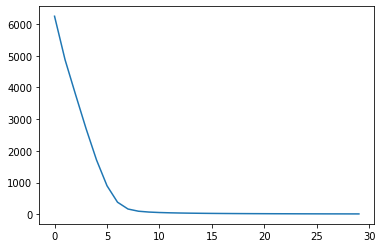

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def showPlot(points, title):
    plt.figure()
    fig, ax = plt.subplots()
    plt.plot(points)

showPlot(cbow_losses, 'CBOW Losses')

We've now trained an embedding using the continuous bag of words model. Below, we also show code for training the opposite model - the skipgram model - where you predict the context words based on a target word.

Note how simple the SkipGram network is. There are no linear layers - just the embedding layer, and the training simply aims to maximize the dot product of embeddings of the target and embedding words.

In [9]:
# Tuple of a word (the target) to a word (a context word)
def create_skipgram_dataset(text):
    import random
    data = []
    for i in range(2, len(text) - 2):
        data.append((text[i], text[i-2], 1))
        data.append((text[i], text[i-1], 1))
        data.append((text[i], text[i+1], 1))
        data.append((text[i], text[i+2], 1))
        # negative sampling
        for _ in range(4):
            if random.random() < 0.5 or i >= len(text) - 3:
                rand_id = random.randint(0, i-1)
            else:
                rand_id = random.randint(i+3, len(text)-1)
            data.append((text[i], text[rand_id], 0))
    return data

skipgram_train = create_skipgram_dataset(text)
print('skipgram sample', skipgram_train[0])

skipgram sample ('a', 'once', 1)


In [10]:
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embd_size):
        super(SkipGram, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embd_size)
    
    def forward(self, focus, context):
        embed_target = self.embeddings(focus).view((1, -1))
        embed_context = self.embeddings(context).view((1, -1))
        score = torch.mm(embed_target, torch.t(embed_context))
        log_probs = F.logsigmoid(score)
    
        return log_probs

In [11]:
def train_skipgram():
    losses = []
    loss_fn = nn.MSELoss()
    model = SkipGram(vocab_size, embd_size)
    print(model)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    for epoch in range(n_epoch):
        total_loss = .0
        print("epoch: ", epoch+1)
        for in_w, out_w, target in skipgram_train:
            # convert a target word and context word to index
            in_w_num = torch.LongTensor([w2i[in_w]])
            out_w_num = torch.LongTensor([w2i[out_w]])
            
            # run target and context through model
            model.zero_grad()
            log_probs = model(in_w_num, out_w_num)
            loss = loss_fn(log_probs[0], torch.Tensor([target]))
            
            # take step
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        losses.append(total_loss)
        print("Loss: ", total_loss)
    return model, losses
    
sg_model, sg_losses = train_skipgram()

SkipGram(
  (embeddings): Embedding(435, 100)
)
epoch:  1
Loss:  150512.54457750372
epoch:  2
Loss:  6254.490208105832
epoch:  3
Loss:  4357.25856299564
epoch:  4
Loss:  4351.332062385759
epoch:  5
Loss:  4349.407155844588
epoch:  6
Loss:  4348.137793039561
epoch:  7
Loss:  4347.2208096520235
epoch:  8
Loss:  4346.519862427976
epoch:  9
Loss:  4345.962776565628
epoch:  10
Loss:  4345.507105687406
epoch:  11
Loss:  4345.126050112074
epoch:  12
Loss:  4344.801755728244
epoch:  13
Loss:  4344.521765085855
epoch:  14
Loss:  4344.277134428344
epoch:  15
Loss:  4344.061225391024
epoch:  16
Loss:  4343.869013179854
epoch:  17
Loss:  4343.69660470205
epoch:  18
Loss:  4343.540948102737
epoch:  19
Loss:  4343.399586259447
epoch:  20
Loss:  4343.270546457365
epoch:  21
Loss:  4343.152211619795
epoch:  22
Loss:  4343.043237081072
epoch:  23
Loss:  4342.9425036925195
epoch:  24
Loss:  4342.849067040968
epoch:  25
Loss:  4342.762128072943
epoch:  26
Loss:  4342.681004520575
epoch:  27
Loss:  4342.6

====Test SkipGram===
Accuracy: 50.0% (4340/8680)


<Figure size 432x288 with 0 Axes>

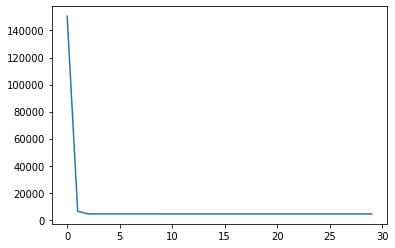

In [12]:
def test_skipgram(test_data, model):
    print('====Test SkipGram===')
    correct_ct = 0
    for in_w, out_w, target in test_data:
        in_w_var = torch.LongTensor([w2i[in_w]])
        out_w_var = torch.LongTensor([w2i[out_w]])

        model.zero_grad()
        log_probs = model(in_w_var, out_w_var)
        _, predicted = torch.max(log_probs, 1)
        predicted = predicted.item()
        if predicted == target:
            correct_ct += 1

    print('Accuracy: {:.1f}% ({:d}/{:d})'.format(correct_ct/len(test_data)*100, correct_ct, len(test_data)))

test_skipgram(skipgram_train, sg_model)
showPlot(sg_losses, 'SkipGram Losses')

In [29]:
# RNN that uses an embedding layer and an LSTM Layer
# The emedding will be taken from the Skip Gram model
class RNN(nn.Module):
    def __init__(self, vocab_size, embd_size, embed):
        super(RNN, self).__init__()
        self.lstm_size = embd_size
        self.num_layers = 3

        self.embedding = embed

        self.lstm = nn.LSTM(
            input_size=self.lstm_size,
            hidden_size=self.lstm_size,
            num_layers=self.num_layers,
            dropout=0.2,
        )
        self.fc = nn.Linear(self.lstm_size, vocab_size)

    def forward(self, x, prev_state):
        embed = self.embedding(x)
        output, state = self.lstm(embed, prev_state)
        logits = self.fc(output)
        return logits, state

    def init_state(self, sequence_length):
        return (torch.zeros(self.num_layers, sequence_length, self.lstm_size),
                torch.zeros(self.num_layers, sequence_length, self.lstm_size))

In [30]:
model = RNN(vocab_size, embd_size, sg_model.embeddings)

word = "volume"
tok = torch.LongTensor([w2i[word]]).view(1, 1)

state = model.init_state(1)

for i in range(10):
    print(word)
    logits, state = model(tok, state)
    _, predicted = torch.max(logits.view(1,-1), 1)
    word = i2w[predicted.item()]
    start = torch.LongTensor([w2i[word]]).view(1, 1)

volume
lining
seeming
seeming
seeming
seeming
seeming
seeming
lining
seeming
